#Sprint 3

##***Sentiment Analysis***

Sentiment analysis is one of the fastest growing areas which uses the natural language processing (NLP), text mining, and computational linguistics to extract useful information to help in the decision making process.

**Text Classification:**

Text classification commonly used natural language processing task that involves assigning to it an appropriate category from a pre-defined set of categories. The dataset of choice determines the set of categories. Text classification has applications in emotion classification, news classification, spam email detection, auto-tagging of customer queries etc.

**Problem Statement:**

The goal of this exercise is perform ***text classification***, applying it to real-world E-Commerce data to analyze customer sentiments. You will explore and apply a variety of machine learning techniques, each offering a unique approach to understanding and categorizing text data. The methodologies we will focus on are:
1. Logistic Regression - A foundational technique for classification problems, offering a straightforward and interpretable model.
2. Support Vector Machines (SVM) - A flexible method for classification, capable of handling linear and nonlinear data.
3. Decision Trees - A graphical representation that uses branching methods to illustrate every possible outcome of a decision, ideal for handling complex datasets.
4. Random Forest - An ensemble learning method that operates by constructing a multitude of decision trees at training time, enhancing the classification accuracy.
5. Naive Bayes - A simple probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
6. KNN - The K-Nearest Neighbors (KNN) algorithm is a machine learning technique that relies on the idea that similar data points tend to have similar labels or values. It used for classification and regression tasks.

**Expectations**:

1. Apply appropriate preprocessing techniques to prepare the dataset for modeling.
2. Implement each of the listed machine learning algorithms.
3. Conduct a comparative analysis of the models based on performance metrics like accuracy, precision, recall, and F1-score.
4. Derive a conclusion: After setting up the classification models, we'll dive into analyzing their results to draw meaningful conclusions.

This comprehensive exercise will guide you through the entire process of developing a machine learning (ML) model, step by step:

1. **Libraries and Installations**: We'll start by installing/introducing the necessary Python libraries and tools required for this exercise.
2. **Data Extraction**: This step involves extracting the dataset and visualizing its raw data. We will load the data, understand its structure, and visualize patterns or insights, before preprocessing and modeling.
3. **Data Preprocessing**: Preprocessing is key to successful model performance. You'll clean and prepare your data by handling missing values, encoding categorical variables, and normalizing features to ensure our models can learn effectively.
4. **Feature Extraction**: Extracting relevant features from the dataset is vital for text classification. This phase focuses on transforming raw text into a structured form that ML models can understand, using techniques like tokenization, stop word removal, and vectorization.
5. **Classification Model Development**: With the data ready, you'll develop various classification models as outlined previously (e.g., Logistic Regression, SVM, etc.). This step focuses on model implementation and parameter tuning. Alternatively, we can call existing model for evaluation.
6. **Model Evaluation**: Evaluating model performance is an important step. We'll learn to use metrics such as accuracy, precision, recall, and F1-score to assess each model's effectiveness and identify areas for improvement.
7. **Conclusion**: Finally, we'll conclude the exercise by analyzing the results from each model, drawing insights about their performance, and discussing the implications of our findings for real-world applications in E-commerce sentiment analysis.

##Step 1: Libraries and Installations

**General Purpose and Data Handling**
1. numpy (np): A fundamental package for scientific computing in Python, used for working with arrays, linear algebra, and other mathematical operations.
2. pandas (pd): A library providing high-performance, easy-to-use data structures, and data analysis tools, especially useful for manipulating and analyzing tabular data.
**Visualization Libraries**
1. matplotlib: A plotting library for creating static, interactive, and animated visualizations in Python.
2. matplotlib.pyplot (plt): A module in matplotlib for plotting graphs, used for creating figures and axes programmatically.
matplotlib.patches (mpatches): Used for creating and adding shapes (like circles, rectangles) to your plots, often for annotation or highlighting.
3. seaborn (sns): A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.
4. plotly.express (px) & plotly.graph_objects (go): Interactive graphing libraries for Python, allowing for complex interactive plots and figures.
plotly.subplots & plotly.offline: Used for creating subplots and enabling the display of Plotly figures in offline environments like Jupyter notebooks.
**Natural Language Processing (NLP) Libraries**
1. string, re, nltk: Libraries used for text manipulation, regular expressions, and natural language processing tasks like tokenization, stemming, and tagging.
2. num2words: Converts numbers into words, useful in NLP for normalizing text data.
3. spellchecker: Identifies and corrects spelling errors in text data.
spacy: An industrial-strength NLP library for advanced text processing and analysis.
**Machine Learning and Feature Extraction**
1. TfidfVectorizer: Converts a collection of raw documents into a matrix of TF-IDF features, essential for text analysis in machine learning.
scipy & scipy.sparse: Libraries for scientific and technical computing, including sparse matrix support for efficient storage and computation.
2. Scikit-learn (Sklearn) Machine Learning Library
Provides tools for data preprocessing, model building, model evaluation, and many other machine learning tasks.
3. train_test_split, ParameterGrid: For splitting datasets and generating parameter combinations for tuning.
4. Classifiers like LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, SVC (Support Vector Classifier), RandomForestClassifier, and various Naive Bayes classifiers for building predictive models.
5. GridSearchCV: For exhaustive search over specified parameter values for an estimator, useful for hyperparameter tuning.
**Model Evaluation**
1. metrics and specific functions like accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix: For evaluating the performance of machine learning models.
**Others**
1. json: For parsing JSON data, useful in data processing and API interactions.
2. gensim: Library for unsupervised topic modeling and natural language processing, using modern statistical machine learning.
3. TruncatedSVD: A dimensionality reduction technique used in machine learning to reduce the feature space.
4. time: For accessing time-related functions, useful in performance measurement.

In [ ]:
# @title
#Reference: Library reference from kaggle-notebook by Sugata Ghosh
#https://github.com/sayemimtiaz/kaggle-notebooks
#https://github.com/AlJohri/OpenSubtitles

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# NLP related libraries (NLTK)
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
!pip install num2words
from num2words import num2words
!pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer

# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Scipy
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix

#Sklearn libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, ParameterGrid

# Classifiers (#Use can use this as an internative approach to build your model)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV #for grid search based hyperparameter tuning

# Model evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Others
import json
import gensim
from sklearn.decomposition import TruncatedSVD
import time

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##Step 2: Data Extraction:

Original source: https://doi.org/10.5281/zenodo.3355823

Kaggle link: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification/data

##### Step 2.1: Dataset download

In [ ]:
# Loading and customizing the data
data = pd.read_csv(
    'https://raw.githubusercontent.com/sugatagh/E-commerce-Text-Classification/main/Dataset/ecommerceDataset.csv',
    names = ['label', 'description']
)
data = data[['description', 'label']]

##### Step 2.2: Dataset visulalization

**Q1 : Enter the code to visualize the dataset (headers only)?**

In [ ]:
data.head(0)

,description,label


**Q2: Enter the code to see the dataset shape?**

In [ ]:
data.shape
# Output is (50425, 2) indicating 50425 rows and 2 columns
# First column is class name and second column is the product & description of that class

(50425, 2)

##### Step 2.3: Removing duplicate values and handing missing values

**Missing value handling**

In [ ]:
mv = len(data) - len(data.dropna())
print (mv)

1


**Dropping observations with missing values**

In [ ]:
data.dropna(inplace = True)

**Handling Duplicate observations**

In [ ]:
dv= str(data.duplicated().sum())
print (dv)

22622


**Dropping duplicate data**

In [ ]:
data.drop_duplicates(inplace = True)
data.reset_index(drop = True, inplace = True)

**Rechecking information**

In [ ]:
number_of_duplicates_after_dropping = data.duplicated().sum()

print(number_of_duplicates_after_dropping)

0


In [ ]:
missing_values_after_drop = data.isna().sum()
print (missing_values_after_drop)

description    0
label          0
dtype: int64


##### Step 2.4: Dataset Encoding

**Data encoding**

We can observe from the data that we have 4 catergories, but are not encoded. We could either work as is or encode them as :

The labels are manually encoded with the following scheme:

Electronics ↦ 0

Household ↦1

Books ↦2

Clothing & Accessories ↦3


In [ ]:
# Manual encoding of labels
label_dict = {'Electronics': 0, 'Household': 1, 'Books': 2, 'Clothing & Accessories': 3}
data.replace({'label': label_dict}, inplace = True)

# Display the first 10 rows to verify the encoded labels
print(data[['label', 'description']].head(10))

   label                                        description
0      1  Paper Plane Design Framed Wall Hanging Motivat...
1      1  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2      1  SAF 'UV Textured Modern Art Print Framed' Pain...
3      1  SAF Flower Print Framed Painting (Synthetic, 1...
4      1  Incredible Gifts India Wooden Happy Birthday U...
5      1  Pitaara Box Romantic Venice Canvas Painting 6m...
6      1  Paper Plane Design Starry Night Vangoh Wall Ar...
7      1  SAF 'Ganesh Modern Art Print' Painting (Synthe...
8      1  Paintings Villa UV Textured Modern Art Print F...
9      1  Painting Mantra Art Street - Jardin Bird Frame...


##### Step 2.5: Dataset Visualization

**Visulalization of data**

In [ ]:
# Splitting the dataset by label
data_e = data[data['label'] == 0] # Electronics
data_h = data[data['label'] == 1] # Household
data_b = data[data['label'] == 2] # Books
data_c = data[data['label'] == 3] # Clothing & Accessories

In [ ]:
# Visualization of class frequencies
values = np.array([len(data_e), len(data_h), len(data_b), len(data_c)])
labels = ['Electronics', 'Household', 'Books', 'Clothing & Accessories']
fig = go.Figure(data = [go.Pie(values = values, labels = labels, hole = 0.5, textinfo = 'percent', title = " ")])
text_title = "Comparison of class frequencies"
fig.update_layout(height = 500, width = 800, showlegend = True, title = dict(text = text_title, x = 0.5, y = 0.95))
fig.write_html("figure.html") # Unfortunately, we cannot view this figure on google colab. Hence the html view. The link to the html file will be shown in the 'Files' submenu in the 'Hamburger' menu on the left.

##Step 3: Data Preprocessing

Data preprocessing involves the following steps:

1. **Cleaning the Text:** This step involves removing unnecessary elements from the text data, such as HTML tags, punctuation, numbers, and other non-letter characters, which might not contribute to the analysis. The goal is to simplify the text to its basic components for easier processing.
2. **Tokenization:** Tokenization is the process of breaking down the text into individual words or tokens. This step is crucial for analyzing the text at the word level, facilitating further processing like stopwords removal and lemmatization.
3. **Stopwords Removal:** Stopwords are common words (such as "the", "is", "in") that usually do not carry significant meaning and are often removed from the text. Removing these words helps focus the analysis on the more meaningful parts of the text.
4. **Stemming/Lemmatization:** Stemming is the process of reducing words to their root form, often leading to the removal of derivational affixes. Lemmatization, on the other hand, involves reducing words to their base or dictionary form (lemma), taking into consideration the word's part of speech. Lemmatization is generally more sophisticated and context-aware than stemming. Depending on the level of precision required, you may choose lemmatization over stemming.
5. **Part-of-Speech (POS) Tagging:** POS tagging assigns part-of-speech tags to each word in the text (such as noun, verb, adjective, etc.), based on both its definition and its context. This step is often used in text analysis to understand sentence structure and can be particularly useful for syntactic and semantic analysis. However, it's typically positioned before stemming/lemmatization in NLP pipelines because knowing the part of speech can improve the lemmatization process.

####Step 3.1 Text cleaning

**Q3: Enter the code to clean the text (i.e. the 'description' column in the dataset), and name the cleaned text as 'Cleaned_Description'? Print the output.**

<Hint: We walked through the process in the class>

In [ ]:
def clean(text):
  return_text = text.lower()
  return_text = re.sub(r'<.*?>', '', return_text) #html
  return_text = re.sub(r'[^a-zA-Z\s]', '', return_text) #non-letters
  return_text = re.sub(r'\d+', '', return_text) #numbers
  return_text = re.sub(r'\s+', ' ', return_text).strip() #whitespace
  return return_text

data['Cleaned_Description'] = data['description'].apply(clean)
print(data[['Cleaned_Description']].head(10))


                                 Cleaned_Description
0  paper plane design framed wall hanging motivat...
1  saf floral framed painting wood inch x inch sp...
2  saf uv textured modern art print framed painti...
3  saf flower print framed painting synthetic inc...
4  incredible gifts india wooden happy birthday u...
5  pitaara box romantic venice canvas painting mm...
6  paper plane design starry night vangoh wall ar...
7  saf ganesh modern art print painting synthetic...
8  paintings villa uv textured modern art print f...
9  painting mantra art street jardin bird framed ...


Reference used: https://medium.com/@jorlugaqui/how-to-strip-html-tags-from-a-string-in-python-7cb81a2bbf44
Date Accessed: March 17th, 2024

Query used to google: how to remove html tags from a string in python

From website, I used this code snippet to understand the arguments for re.sub and what to pass in to remove HTML tags and other required non-text components:


In [ ]:
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

####Step 3.2 Tokenization

**Q4: Enter the code to tokenize the 'Cleaned_Description' column, and name the tokenized column as 'tokens'? Print the output.**

<Hint: We walked through the process in the class>

In [ ]:
def tokenize(text):
  return word_tokenize(text)

data['Tokens'] = data['Cleaned_Description'].apply(tokenize)
print(data[['Tokens']].head(10))

                                              Tokens
0  [paper, plane, design, framed, wall, hanging, ...
1  [saf, floral, framed, painting, wood, inch, x,...
2  [saf, uv, textured, modern, art, print, framed...
3  [saf, flower, print, framed, painting, synthet...
4  [incredible, gifts, india, wooden, happy, birt...
5  [pitaara, box, romantic, venice, canvas, paint...
6  [paper, plane, design, starry, night, vangoh, ...
7  [saf, ganesh, modern, art, print, painting, sy...
8  [paintings, villa, uv, textured, modern, art, ...
9  [painting, mantra, art, street, jardin, bird, ...


#### Step 3.3 Stop words removal

**Q5: Enter the code to remove stop words from the text in the 'tokens' column, name the new column as 'Tokens_No_Stopwords' ? Print the output.**

<Hint: We walked through the process in the class>

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def removeStopWords(token_stream):
  stop_words = set(stopwords.words('english'))
  return_tokens = []
  for i in token_stream:
    if i not in stop_words:
      return_tokens.append(i)
  return return_tokens

data['Tokens_No_Stopwords'] = data['Tokens'].apply(removeStopWords)

print(data[['Tokens_No_Stopwords']].head(10))


                                 Tokens_No_Stopwords
0  [paper, plane, design, framed, wall, hanging, ...
1  [saf, floral, framed, painting, wood, inch, x,...
2  [saf, uv, textured, modern, art, print, framed...
3  [saf, flower, print, framed, painting, synthet...
4  [incredible, gifts, india, wooden, happy, birt...
5  [pitaara, box, romantic, venice, canvas, paint...
6  [paper, plane, design, starry, night, vangoh, ...
7  [saf, ganesh, modern, art, print, painting, sy...
8  [paintings, villa, uv, textured, modern, art, ...
9  [painting, mantra, art, street, jardin, bird, ...


####Step 3.4 Stemming/Lemmatization

**Q6: Enter the code to lemmatize the text in column 'Token_No_Stopwords', name the new column as 'Lemmatized_Tokens'? Print the output.**

<Hint: We walked through the process in the class>

In [ ]:
def lemmatizer(token_stream):
  lemmatizer = WordNetLemmatizer()
  return_value = []
  for i in token_stream:
    lemmatized_token = lemmatizer.lemmatize(i)
    return_value.append(lemmatized_token)
  return return_value

data['Lemmatized_Tokens'] = data['Tokens_No_Stopwords'].apply(lemmatizer)
print(data[['Lemmatized_Tokens']].head(10))


                                   Lemmatized_Tokens
0  [paper, plane, design, framed, wall, hanging, ...
1  [saf, floral, framed, painting, wood, inch, x,...
2  [saf, uv, textured, modern, art, print, framed...
3  [saf, flower, print, framed, painting, synthet...
4  [incredible, gift, india, wooden, happy, birth...
5  [pitaara, box, romantic, venice, canvas, paint...
6  [paper, plane, design, starry, night, vangoh, ...
7  [saf, ganesh, modern, art, print, painting, sy...
8  [painting, villa, uv, textured, modern, art, p...
9  [painting, mantra, art, street, jardin, bird, ...


####Step 3.5 Part-of-Speech (POS) Tagging

**Q7: Enter the code to tag POS the text in 'description' column, and name the tagged POS data column as 'POS_Tags'? Print the output.**

<Hint: We walked through the process in the class>

In [ ]:
def tagging(text):
  return pos_tag(word_tokenize(text))

data['POS_Tags'] = data['description'].apply(tagging)
print(data[['POS_Tags']].head(10))

                                            POS_Tags
0  [(Paper, NNP), (Plane, NNP), (Design, NNP), (F...
1  [(SAF, NNP), ('Floral, NNP), (', POS), (Framed...
2  [(SAF, NNP), ('UV, POS), (Textured, NNP), (Mod...
3  [(SAF, NNP), (Flower, NNP), (Print, NNP), (Fra...
4  [(Incredible, JJ), (Gifts, NNP), (India, NNP),...
5  [(Pitaara, NNP), (Box, NNP), (Romantic, NNP), ...
6  [(Paper, NNP), (Plane, NNP), (Design, NNP), (S...
7  [(SAF, NNP), ('Ganesh, POS), (Modern, NNP), (A...
8  [(Paintings, NNS), (Villa, NNP), (UV, NNP), (T...
9  [(Painting, VBG), (Mantra, NNP), (Art, NNP), (...


##Step 4: Feature Extraction (Vectorization):

Feature extraction or vectorization involves converting text data into numerical vectors or features that machine learning algorithms can work with. Techniques like Bag of Words, TF-IDF, or word embeddings (Word2Vec, GloVe) are common methods used for this purpose.

For simplicity, we will proceed with TF-IDF approach.

**TF-IDF** stands for **Term Frequency-Inverse Document Frequency**. It's a statistical measure used to evaluate how important a word is to a document in a collection of documents. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. TF-IDF helps in understanding the relevance of words within documents in relation to a document set. TF-IDF is widely used in information retrieval and text mining to weigh and evaluate words in documents for tasks like search, document classification, and topic modeling.

1. **Term Frequency (TF)**: How frequently a term occurs in a document. If a word appears frequently in a document, it's important for that document.

    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

2. **Inverse Document Frequency (IDF)**: How unique or common a word is across all documents. If a word appears in many documents (multiple times), it's not a unique identifier.

    DF(t) = log_e(Total number of documents / Number of documents with term t in it).

**Example:**

Consider 3 documents which contains chapters on
1. Bear eat salmon
2. Salmon eat shrimp
3. Bear hibernate winter

The TF-IDF score is:

**Step 1: Calculate TF**

TF = (Number of times term appears in a document) / (Total number of terms in the document)

*Document 1 (3 words total)*

Bear: 1/3

eat: 1/3

salmon: 1/3

*Document 2 (3 words total)*

Salmon: 1/3

eat: 1/3

shrimp: 1/3

*Document 3 (3 words total)*

Bear: 1/3

hibernate: 1/3

winter: 1/3

**Step 2: Calculate IDF**

IDF = log(Total number of documents / Number of documents containing the term), assuming log base e

Bear: log(3/2) = 0.405

eat: log(3/2) = 0.405

salmon: log(3/1) = 1.099

shrimp: log(3/1) = 1.099

hibernate: log(3/1) = 1.099

winter: log(3/1) = 1.099

**Step 3: Calculate TF-IDF**

TF-IDF = TF * IDF for each term in each document

*Document 1:*

Bear: (1/3) * 0.405 = 0.135

eat: (1/3) * 0.405 = 0.135

salmon: (1/3) * 1.099 = 0.366

*Document 2:*

Salmon: (1/3) * 1.099 = 0.366

eat: (1/3) * 0.405 = 0.135

shrimp: (1/3) * 1.099 = 0.366

*Document 3:*

Bear: (1/3) * 0.405 = 0.135

hibernate: (1/3) * 1.099 = 0.366

winter: (1/3) * 1.099 = 0.366

**Conclusion:**

- Words unique to a single document (salmon, shrimp, hibernate, winter) have higher TF-IDF scores, indicating in their respective document, they are important.
- Common words across documents (eat, bear) have lower TF-IDF scores, reflecting their commonality.


In [ ]:
data['cleaned_text'] = data['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
print(data[['cleaned_text']].head(10))

                                        cleaned_text
0  paper plane design framed wall hanging motivat...
1  saf floral framed painting wood inch x inch sp...
2  saf uv textured modern art print framed painti...
3  saf flower print framed painting synthetic inc...
4  incredible gift india wooden happy birthday un...
5  pitaara box romantic venice canvas painting mm...
6  paper plane design starry night vangoh wall ar...
7  saf ganesh modern art print painting synthetic...
8  painting villa uv textured modern art print fr...
9  painting mantra art street jardin bird framed ...


In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
                                   min_df=5,
                                   max_df=0.9,
                                   stop_words='english')

# Fit and transform the preprocessed text data to create TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

##Step 5: ML models

####Step 5.1 Split dataset

A train-test split is a procedure used to evaluate the performance of machine learning algorithms. It involves splitting a dataset into two subsets: a training set and a test set.

**Q8 Write the code to split the dataset with 'X' as TF-IDF matrix ('tfidf_vectorizer') and 'y' as labels ('label')? Print the output**

Step 1: Assign X to TF-IDF matrix column header

Step 2: Assign y to labels column header

Step 3: Split the dataset into 80% training and 20% testing, using


```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

Step 4: Print the shape of X_train, y_train, X_test, and y_test




In [ ]:
X = tfidf_features
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22241, 1000)
(22241,)
(5561, 1000)
(5561,)


#### Step 5.2 Model development

In [ ]:
names = [
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]

models = [
    LogisticRegression(max_iter=1000),
    SVC(kernel='linear'),  # For SVM, linear kernel is a common choice; adjust as necessary
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),  # Naive Bayes
]

In [ ]:
def score(X_train, y_train, X_test, y_test, names=names, models=models):
    score_df = pd.DataFrame()
    score_train, score_test = [], []
    x = time.time()
    for name, model in zip(names, models):
        # Convert to dense only for models that require it (e.g., GaussianNB)
        if name == "Naive Bayes":
            X_train_dense = X_train.toarray()
            X_test_dense = X_test.toarray()
            model.fit(X_train_dense, y_train)
            y_train_pred = model.predict(X_train_dense)
            y_test_pred = model.predict(X_test_dense)
        else:
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

        score_train.append(accuracy_score(y_train, y_train_pred))
        score_test.append(accuracy_score(y_test, y_test_pred))

    score_df["Classifier"] = names
    score_df["Training accuracy"] = score_train
    score_df["Test accuracy"] = score_test
    score_df.sort_values(by='Test accuracy', ascending=False, inplace=True)
    return score_df

summary_df = score(X_train, y_train, X_test, y_test)
print(summary_df)


               Classifier  Training accuracy  Test accuracy
0     Logistic Regression           0.942449       0.935983
1  Support Vector Machine           0.946990       0.934184
3           Random Forest           0.997842       0.925553
4             Naive Bayes           0.884942       0.879158
2           Decision Tree           0.997842       0.875382


**Q9 From the output which is the best model?**

**Random Forest**

The best model would be one that has a balance between relatively high training accuracy and test accuracy. It is better to have similar training and text accuracy scores over simply high scores because it means the model generalizes well on unseen data. Among the results, the best model would be Logistic Regression as that has the least difference between training and testing accuracy, meaning the model does not overfit and generalizes well.

**Q10 Modify the number of parameters for RandomForestClassifier(n_estimators=100) to n_estimators = 600. Report (print output of the updated accuracy scores)  and compare accuracy scores for training and test dataset? What do you observe?**

In [ ]:
new_models = [
    LogisticRegression(max_iter=1000),
    SVC(kernel='linear'),  # For SVM, linear kernel is a common choice; adjust as necessary
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=600),
    GaussianNB(),  # Naive Bayes
]


summary_df = score(X_train, y_train, X_test, y_test, names, new_models)
print(summary_df)

               Classifier  Training accuracy  Test accuracy
0     Logistic Regression           0.942449       0.935983
1  Support Vector Machine           0.946990       0.934184
3           Random Forest           0.997842       0.923215
2           Decision Tree           0.997842       0.880417
4             Naive Bayes           0.884942       0.879158


When updating n=100 to n=600, the training accuracy remained very high at ~.998 but test accuracy remained lower than training accuracy at ~.925. The hope was that by increasing the amount of estimates, the model would be better at generalizing unseen data. However, that did not turn out to be true, meaning that Random Forest is still overfitting data and is not accuracte on new data.

**Introducing a new Classifier:**

**Q11: Add a new classifier: Introduce a new classifier: KNeighborsClassifier. How does it perform compared to other models? Would you recommend this model for this dataset? How else can you improve its performance (hint: Step 5.3)?**

remember to check if you have imported the classifier in the library.


```
from sklearn.neighbors import KNeighborsClassifier
```
and KNeighborsClassifier is defined as

```
KNeighborsClassifier()
```




In [ ]:
from sklearn.neighbors import KNeighborsClassifier

new_names = [
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes",
    "KNeighbors"
]

new_models = [
    LogisticRegression(max_iter=1000),
    SVC(kernel='linear'),  # For SVM, linear kernel is a common choice; adjust as necessary
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=600),
    GaussianNB(),  # Naive Bayes
    KNeighborsClassifier(),
]

def score(X_train, y_train, X_test, y_test, names, models):
    score_df = pd.DataFrame()
    score_train, score_test = [], []
    x = time.time()
    for name, model in zip(names, models):
        # Convert to dense only for models that require it (e.g., GaussianNB)
        if name == "Naive Bayes":
            X_train_dense = X_train.toarray()
            X_test_dense = X_test.toarray()
            model.fit(X_train_dense, y_train)
            y_train_pred = model.predict(X_train_dense)
            y_test_pred = model.predict(X_test_dense)
        else:
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

        score_train.append(accuracy_score(y_train, y_train_pred))
        score_test.append(accuracy_score(y_test, y_test_pred))

    score_df["Classifier"] = names
    score_df["Training accuracy"] = score_train
    score_df["Test accuracy"] = score_test
    score_df.sort_values(by='Test accuracy', ascending=False, inplace=True)
    return score_df


summary_df = score(X_train, y_train, X_test, y_test, new_names, new_models)
print(summary_df)

NameError: name 'X_train' is not defined

Comparing KNeighbors to the other models, it's performance is the worst in training and testing accuracy with a score of .796 and .749 respectively. Compared to the accuracy of other models, it is signifigantly worse at generalizing data it is trained on and data that it has not seen before. I would reccomend not utilzing this model and to stick with Logistic Regression. Perhaps if we hyperparameter tuned the KKN model, then we can see better results.

#### Step 5.3 Hyperparameter tuning

Hyperparameter tuning involves experimenting with different settings for the hyperparameters of a machine learning model to find the configuration that produces the best results. We shall perform hyperparameter tuning using "GridSearchCV" from Scikit-Learn, which systematically works through multiple combinations of parameter options, cross-validating as it goes to determine which tune gives the best performance.


**Note:** In the interest of time and availability of computational resources availability and complexity, we will perform hyperparameterization for Logistic Regression and KNN only. Although, you are welcome to try out for the others.

#####Step 5.3.1 Hyperparameter tuning for Logistic Regression

*Parameters to optimize:*

C: Inverse of regularization strength; smaller values specify stronger regularization.

solver: Algorithm to use in the optimization problem.

In [ ]:
# Hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
}

# Grid search
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best settings and their respective accuracy values
best_lr = grid_search.best_estimator_
y_train_pred = best_lr.predict(X_train)
y_test_pred = best_lr.predict(X_test)

print(f"Best settings for Logistic Regression: {grid_search.best_params_}")
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Testing accuracy: {accuracy_score(y_test, y_test_pred)}")

Best settings for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Training accuracy: 0.9424486309068837
Testing accuracy: 0.9359827369178205


**Q12: Compare the new accuracy values (training and testing). What do you observe, is there an improvement after hyperparameter tuning?**

The new values are the same as the old training and testing values for logistic regression. This indicates that hyperparameter tuning did not improve the values of logistic regression, meaning our conclusion about the fitness of this model remains.

##### Step 5.3.6 Hyperparameter tuning for KNN

*Parameters to optimize:*

n_neighbors: Number of neighbors to use.

weights: Weight function used in prediction.

**Q 13: Implement hyperparameter tuning for KNN. Report the results. Is it better than other models? Is your conclusion about KNN prior to hyperparameter tuning same as after hyperparameter tuning?**  to implement the code, use the hint for the parameter settings.

hint:



```
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

```



In [ ]:
param_grid = {
    'n_neighbors': [3],
    'weights': ['distance'],
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_

y_train_pred = best_knn.predict(X_train)
y_test_pred = best_knn.predict(X_test)


print(f"Best settings for KNN: {grid_search_knn.best_params_}")
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Testing accuracy: {accuracy_score(y_test, y_test_pred)}")

Best settings for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Training accuracy: 0.9978418236590081
Testing accuracy: 0.8018342024815681


After hyperparameter tuning for the KNN model, the values for training and testing increased dramatically. The training accuracy is a whopping .998 meaning it is very accurate on tested data. The testing accuracy has also increased from .749 to .802 after hyperparameter tuning. However, there is also a more signifigant difference between the training and testing accuracy, signifying that KKN is not well suited for data it has not observed before and is overfitting data that it has seen before.

#####Step 5.3.2 Hyperparameter tuning for SVM

C: Regularization parameter.


kernel: Specifies the kernel type to be used in the algorithm.



```
# Hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
}

grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

# Print the best settings and their respective accuracy values
best_svc = grid_search_svm.best_estimator_
y_train_pred_svc = best_svc.predict(X_train)
y_test_pred_svc = best_svc.predict(X_test)

print(f"Best settings for SVM: {grid_search_svm.best_params_}")
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred_svc)}")
print(f"Testing accuracy: {accuracy_score(y_test, y_test_pred_svc)}")
```



#####Step 5.3.3 Hyperparameter tuning for Decision Trees

max_depth: The maximum depth of the tree.


min_samples_split: The minimum number of samples required to split an internal node.



```
# Hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)

# Print the best settings and their respective accuracy values
best_dt = grid_search_dt.best_estimator_
y_train_pred_dt = best_dt.predict(X_train)
y_test_pred_dt = best_dt.predict(X_test)

print(f"Best settings for Decision Trees: {grid_search_dt.best_params_}")
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred_dt)}")
print(f"Testing accuracy: {accuracy_score(y_test, y_test_pred_dt)}")
```



#####Step 5.3.4 Hyperparameter tuning for Random Forest

n_estimators: The number of trees in the forest.


max_depth: Maximum depth of the trees.



```
# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

# Print the best settings and their respective accuracy values
best_rf = grid_search_rf.best_estimator_
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)

print(f"Best settings for Decision Trees: {grid_search_rf.best_params_}")
print(f"Training accuracy: {accuracy_score(y_train, y_train_pred_rf)}")
print(f"Testing accuracy: {accuracy_score(y_test, y_test_pred_rf)}")
```



##### Step 5.3.5 Hyperparameter tuning for Naive Bayes

For Gaussian Naive Bayes, there are not many hyperparameters to tune. Generally, Naive Bayes is used as is.

## Step 6: Results Evaluation

####Confusion Matrix

**Confusion matrix:** A confusion matrix is a table that is used to define the performance of a classification algorithm.

for more info:

https://medium.com/analytics-vidhya/what-is-a-confusion-matrix-d1c0f8feda5

https://developer.ibm.com/tutorials/awb-confusion-matrix-python/

Lets evaluate the models for text classification. Below is the code that prints the confusion matrix for predicted vs. actual labels.

In [ ]:
optimized_logistic_regression = grid_search.best_estimator_
optimized_svm = SVC(kernel='linear')
optimized_decision_tree = DecisionTreeClassifier()
optimized_random_forest = RandomForestClassifier(n_estimators=100)
optimized_naive_bayes = GaussianNB()

In [ ]:
names = [
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]
models = [
    optimized_logistic_regression,  # Optimized logistic regression model
    optimized_svm,                  # Optimized SVC
    optimized_decision_tree,        # Optimized Decision Tree
    optimized_random_forest,        # Optimized Random Forest
    optimized_naive_bayes,          # Optimized Naive Bayes (same as the old)
]

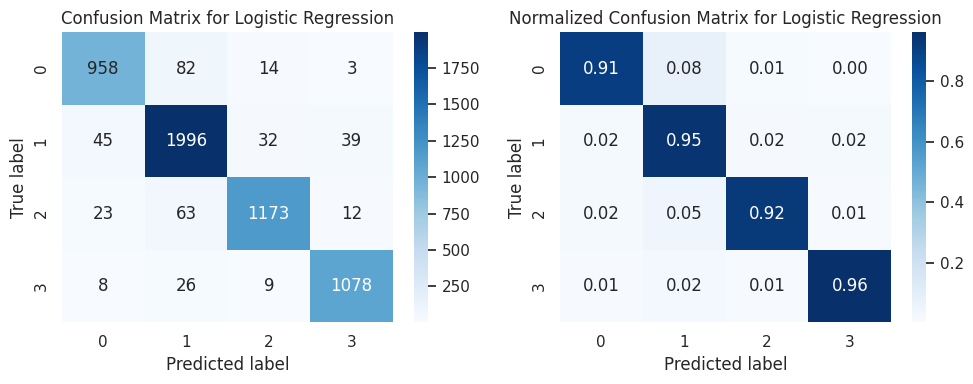

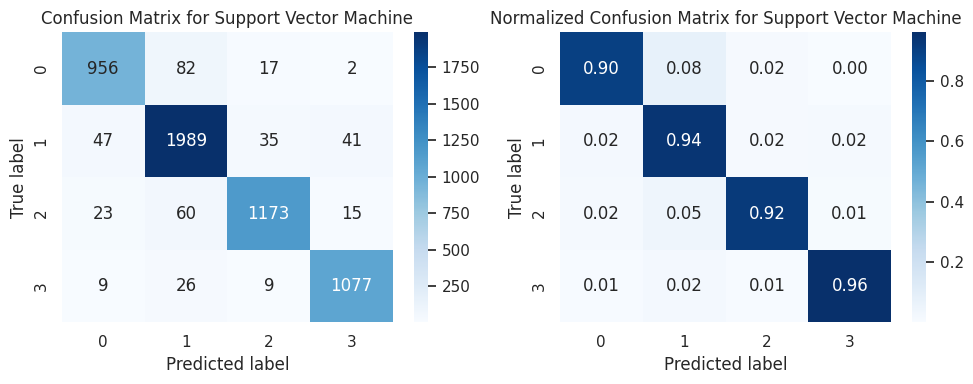

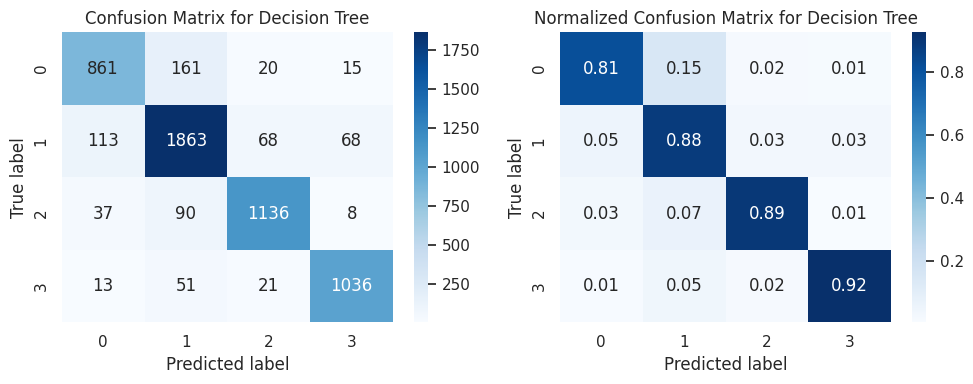

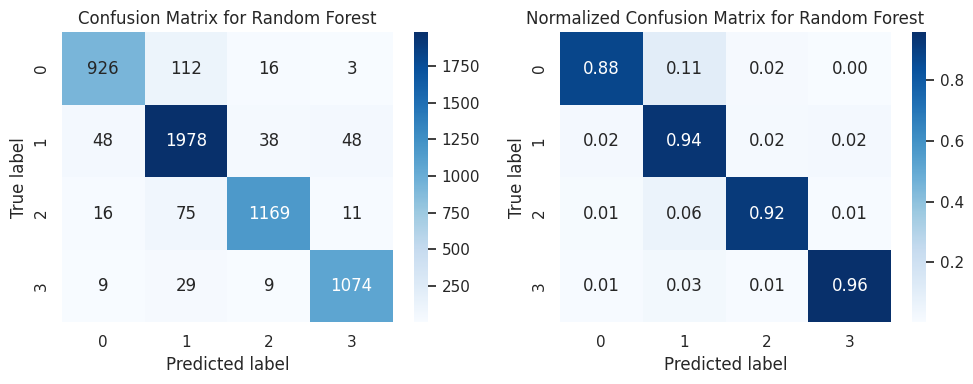

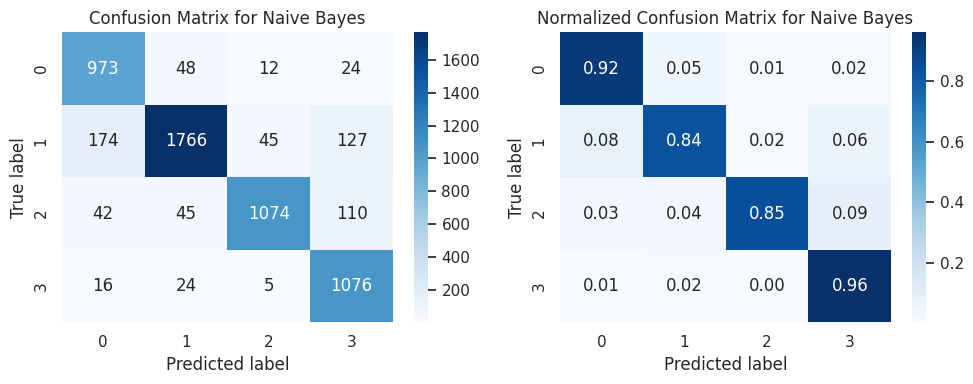

In [ ]:
for name, model in zip(names, models):
    # Convert to dense only for models that require it (e.g., GaussianNB)
    if name == "Naive Bayes":
        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Standard Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)  # Plot in the first subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Normalized Confusion Matrix
    cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
    plt.subplot(1, 2, 2)  # Plot in the second subplot
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"Normalized Confusion Matrix for {name}")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

**Q14: How will you read and explain results from the confusion matrix (- Attach references if used (including chatgpt prompts)) to a non-technical stakeholder? Which model would you recommend for this dataset and why?**

Which Model I recommend: Logistic Regression

That's because it has the most consistent high diagonal values and low off-diagonal values, indicating that each product is being classified accurately. Although Logistic Regression does not have the highest normalized matrix values for each class, the model's accuracy and precision is its strength. It is consistently classifying above 90% which indicates that all the product categories are being correctly predicted by the model

How to read the Confusion Matrix Results: To the stakeholders, the confusion matrix analyzes each classification model and analyzes how many true positives and negatives (denoted by the diagonal values) are being predicted vs the model's false positives and false negatives. The confusion matrix to the left are raw values while the normalized confusion matrix to the right are percentages. Normalized confusion matrices allow us to compare model performance and see out all predictions, how well did the model perform on that class by percentages. Each row should sum to 1 as that indicates out of all the classifications, how many did it classify falsely. The true values are along the highlighted diagonal, and higher consistency among each class is key to determining which model is best. We are not necessarily looking for the highest percentage values; we want to seek out models that for all classes, it has high consistency to classify correctly.

**Q15: Implement the confusion matrix code for the KNN model (before and after performing hyperparameter optimization)? Display the confusion matrix. Based on the confusion matrix and the accuracy scores, what is the takeaway?**

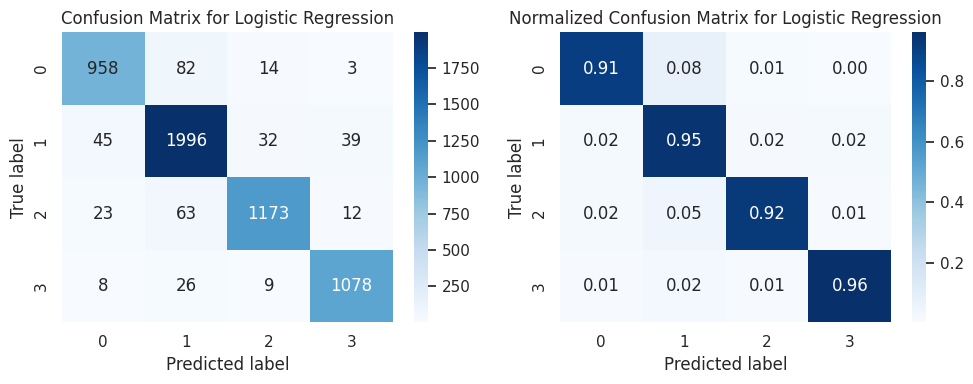

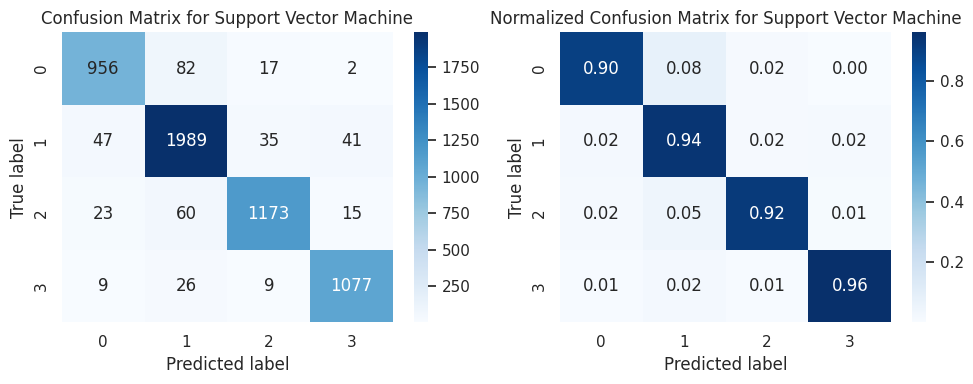

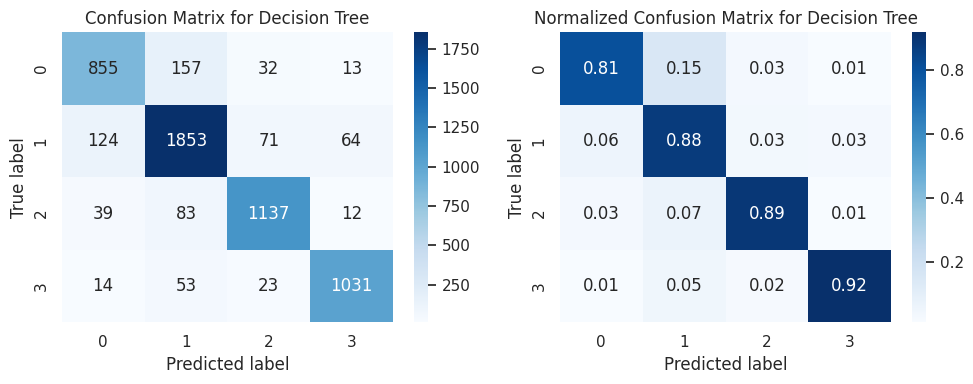

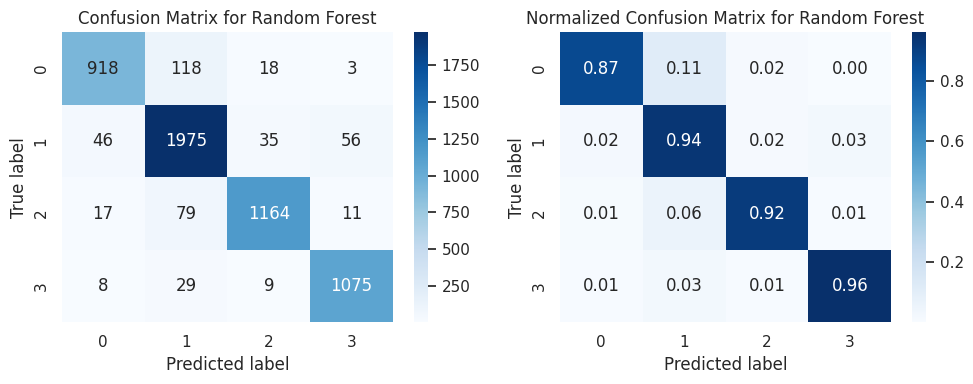

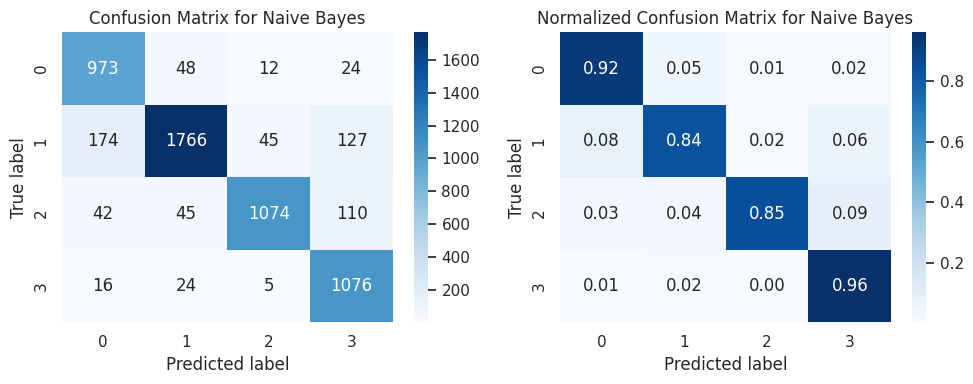

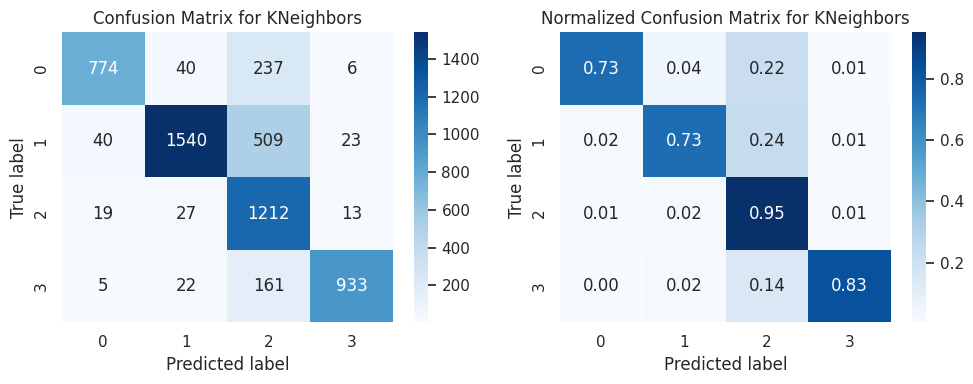

In [ ]:
param_grid_knn = {
    'n_neighbors': [3],
    'weights': ['distance'],
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs = -1)
grid_search_knn.fit(X_train, y_train)

best_knn = grid_search_knn.best_estimator_

names.append("KNeighbors")
models.append(best_knn)

for name, model in zip(names, models):
    # Convert to dense only for models that require it (e.g., GaussianNB)
    if name == "Naive Bayes":
        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Standard Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)  # Plot in the first subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    # Normalized Confusion Matrix
    cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
    plt.subplot(1, 2, 2)  # Plot in the second subplot
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
    plt.title(f"Normalized Confusion Matrix for {name}")
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()


The takeaway after performing a confusion matrix for KNeighbors, the accuracy of the model returning true positives is what was expected before, even after performing hyperparameter optimization. KNeighbors did not do so well with untrained data but predicted very accurately on trained data, suggesting it overfitted on the trained data. After normalizing the Confusion Matrix for KNeighbors, the diagonal that shows the percentage of true positives is inconsistent and lower than other models. The key takeaway is that Logistic Regression is still the best model to use in this scenario.

####Precision, recall, and F1-score


Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all observations in the actual class.

F1-Score: The F1 Score is the weighted average of Precision and Recall. This score takes both false positives and false negatives into account.

In [ ]:
optimized_logistic_regression = grid_search.best_estimator_
optimized_svm = SVC(kernel='linear')
optimized_decision_tree = DecisionTreeClassifier()
optimized_random_forest = RandomForestClassifier(n_estimators=100)
optimized_naive_bayes = GaussianNB()

In [ ]:
names = [
    "Logistic Regression",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]
models = [
    optimized_logistic_regression,  # Optimized logistic regression model
    optimized_svm,                  # Optimized SVC
    optimized_decision_tree,        # Optimized Decision Tree
    optimized_random_forest,        # Optimized Random Forest
    optimized_naive_bayes,          # Optimized Naive Bayes (same as the old)
]

In [ ]:
for name, model in zip(names, models):
    # Convert to dense only for models that require it (e.g., GaussianNB)
    if name == "Naive Bayes":
        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")



Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1057
           1       0.92      0.95      0.93      2112
           2       0.96      0.92      0.94      1271
           3       0.95      0.96      0.96      1121

    accuracy                           0.94      5561
   macro avg       0.94      0.93      0.94      5561
weighted avg       0.94      0.94      0.94      5561



Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1057
           1       0.92      0.94      0.93      2112
           2       0.95      0.92      0.94      1271
           3       0.95      0.96      0.95      1121

    accuracy                           0.93      5561
   macro avg       0.94      0.93      0.93      5561
weighted avg       0.93      0.93      0.93      5561



Classification Report for Dec

From the above output, lets dive into one of the reports for Logistic Regression model:

0,1,2,3: Indicate classes of our dataset.

Support: The support is the number of actual occurrences of the class in the specified dataset. It's the actual number of instances for each class used to compute the metrics.

Example: Class 3 has a support value of 1121, meaning there are 1121 instances of class 3 in your test dataset.

Accuracy: Accuracy is the ratio of correctly predicted observations to the total observations. It's the overall effectiveness of the model across all classes.

Example: An accuracy of 0.93 means that 93% of all predictions made by the model across all classes were correct.

Macro Avg and Weighted Avg:



> Macro Avg: This is the average precision, recall, and F1-score across all classes without considering the imbalance in the dataset (i.e., each class is given equal weight).

> Weighted Avg: This is similar to the macro average, but it takes the support (the number of instances for each class in the test data) into account. It gives a better measure of the true quality of the model, especially with imbalanced datasets.

Conclusion:
Our Logistic Regression model is performing well (subjectively speaking ofcourse!!!) across all classes, with high precision, recall, and F1-scores.
Specifically:

- The accuracy of 0.93 indicates a feasible performance.

- The weighted averages are very close to the macro averages, suggests that our dataset might be relatively balanced (which is clear that this is an example and ideal dataset).

- The high scores across metrics suggest that our Logistic regression model is robust in text classification.

**Q16: Write the code to print the Precision, recall, and F1-score for the KNN models (before and after hyperparameter tuning)? What is the impact of hyper parameter tuning on the KNN model and how does it compare with SVM model (hint: feel free to use the internet to learn about Precision, recall, and F1-score and form your takeaway - Attach references if used (including chatgpt prompts))?**

In [ ]:
names.append("KNeighbors")
models.append(best_knn)

for name, model in zip(names, models):
    # Convert to dense only for models that require it (e.g., GaussianNB)
    if name == "Naive Bayes":
        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1057
           1       0.92      0.95      0.93      2112
           2       0.96      0.92      0.94      1271
           3       0.95      0.96      0.96      1121

    accuracy                           0.94      5561
   macro avg       0.94      0.93      0.94      5561
weighted avg       0.94      0.94      0.94      5561



Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1057
           1       0.92      0.94      0.93      2112
           2       0.95      0.92      0.94      1271
           3       0.95      0.96      0.95      1121

    accuracy                           0.93      5561
   macro avg       0.94      0.93      0.93      5561
weighted avg       0.93      0.93      0.93      5561



Classification Report for Dec

This report suggests that KNeighbors has the worst accuracy (.8) out of all the models, even after hyperparameter optimization. It also has the worst weighted average at .81, meaning that the model's precision, recall, and F1-scores are unfit and are not robust in text classification.

When comparing KNN to the SVM model, SVM outperforms KNN in all metrics: precision, recall, F1-scores, and accuracy. Precision measures the amount of true positives the model identified and recall is how many positive idenifications that were actually correct, while f1-scores is the average of recall and precision. In terms of these scores, SVM drastically outperformed KNN, suggesting SVM is the superior model to determine text sentiment.

## Step 7: Conclusion

**Q17: Given the results, how would you explain it to a non-technical stakeholder? What insights can be drawn from it regarding the model's performance and what recommendations will you make?**

Hint: What do the findings indicate? Which model would you recommend and which model is to be avoided?  What would be your next steps if you were leading a product team? Are these metrics enough for your decisions?

Throughout the entire process of conducting sentiment analysis, the model that performs the best is Logistic Regression. Analyzing text sentiment is difficult, but the performance and accuracy of Logistic Regression makes it the recommendation model to use for this data set.

Comparing 6 different model choices to use on the data set, logistic regression had the highest accuracy value at .94, meaning that 94% of all predictions made by logistic regression were correct. This is highlighted in it's normalized confusion matrix where all percentages across all classes were consistent and high, reinforcing the conclusion that the model is accurately classifying each product class. Looking at the precision, recall, and F1 scores, they are among the highest compared to all 6 models, meaning it is robust at handling both positive and negative sentiments from customer reviws and is reliable at determining true positives on any new data it sees. Even if the data is not balanced, the high weighted average score of .94 suggest Logistic Regression is the best quality model to use. Overall, the values logistic regression returns highlight its predictive strength and should be the model used for this data set.

# Thank you

We hope this experience has provided you with the basics of sentimental analysis for text classification.